In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('stock market.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Before Cleaning:")
print(df.info())

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
me

In [ ]:
print(df.head())

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [ ]:
#clean the data


# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
# Drop rows where 'Date' is NaT (conversion failed)
df = df.dropna(subset=['Date'])

In [ ]:
# Fill missing values in 'Trades' column with the median
if 'Trades' in df.columns:
    df['Trades'] = df['Trades'].fillna(df['Trades'].median())

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
# Reset index
df = df.reset_index(drop=True)

In [ ]:
print("\nAfter Cleaning:")
print(df.info())
print(df.head())


After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              3322 non-null   float64       
 13  Deliverable Volume  3322 non-nu

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

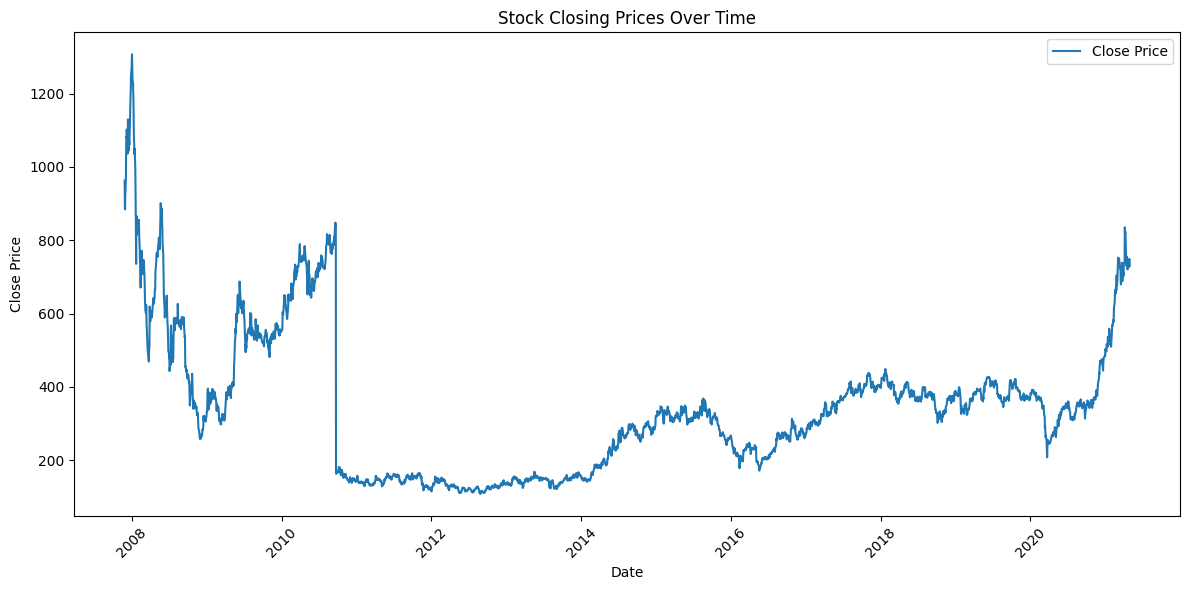

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

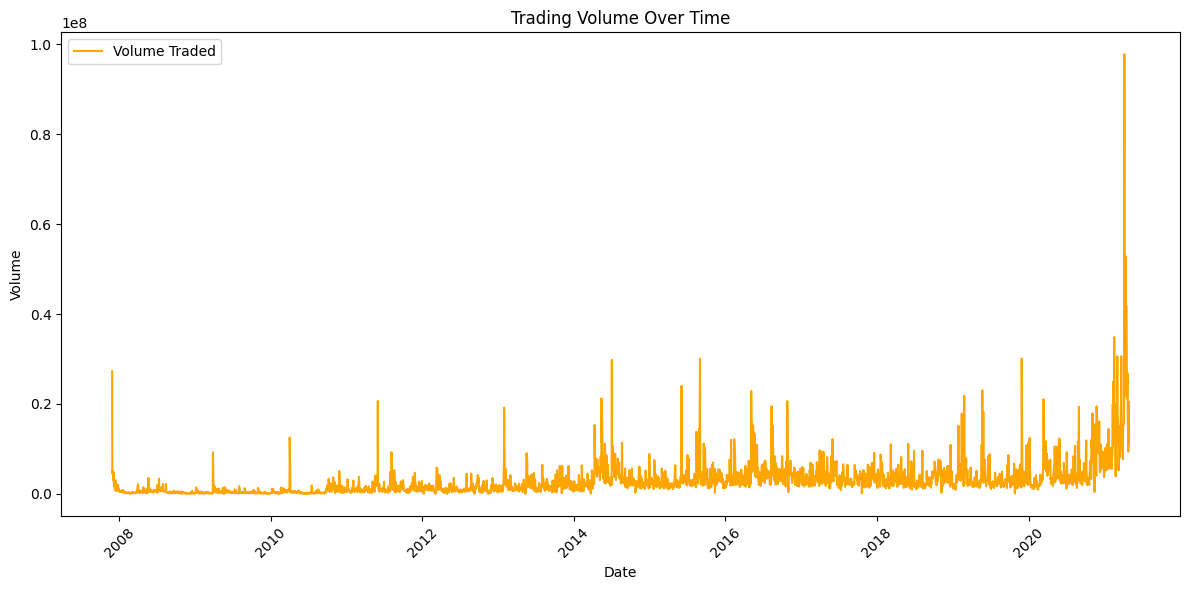

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], color='orange', label='Volume Traded')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

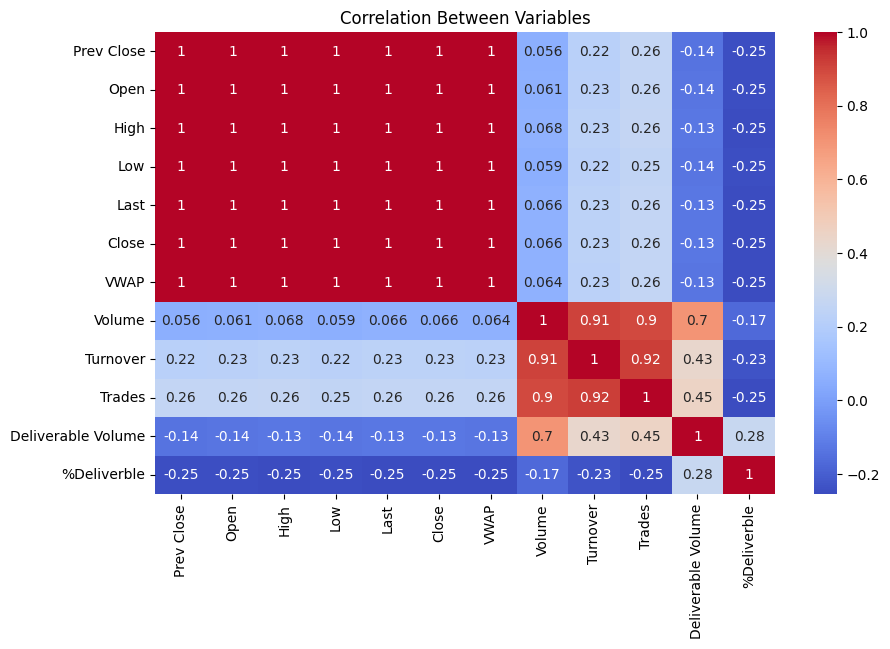

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

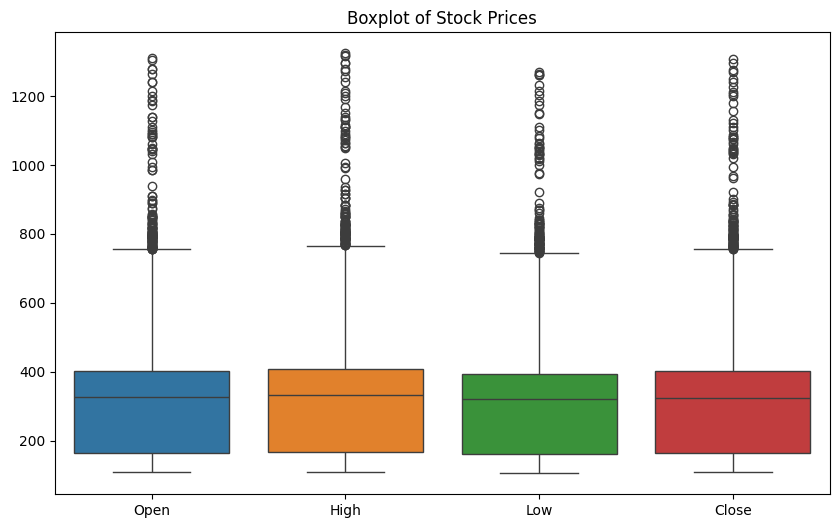

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Stock Prices')
plt.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()

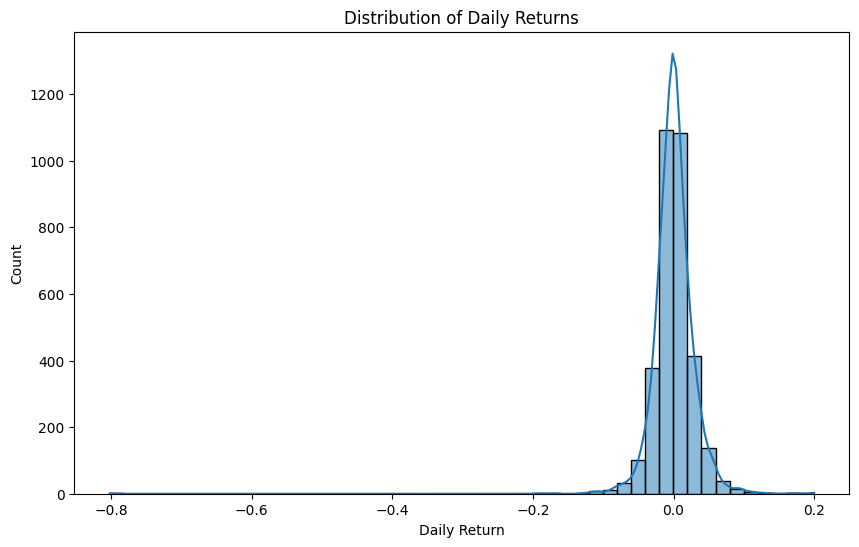

In [ ]:
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10,6))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

ARIMA, SARIMA

✅ Step-by-Step Plan for Time Series Forecasting
Step 1: Filter & Sort the Time Series

In [ ]:
df = df[df['Symbol'] == 'MUNDRAPORT']  # If only one stock
df = df[['Date', 'Close']].sort_values('Date')
df.set_index('Date', inplace=True)


Step 2: Visualize the Data

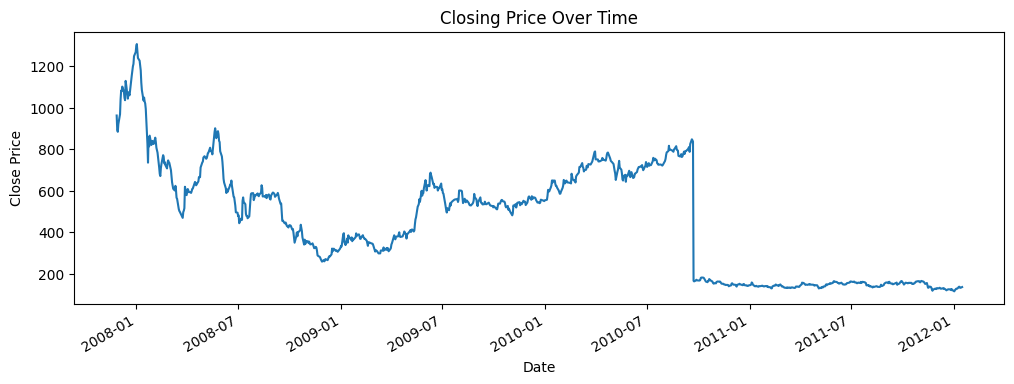

In [ ]:
import matplotlib.pyplot as plt

df['Close'].plot(figsize=(12, 4), title='Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


Step 3: Test for Stationarity
Use the Augmented Dickey-Fuller (ADF) test:

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print(f'p-value: {result[1]}')  # p < 0.05 means stationary


p-value: 0.2872894027100424


Step 4: Plot ACF and PACF to Find Parameters

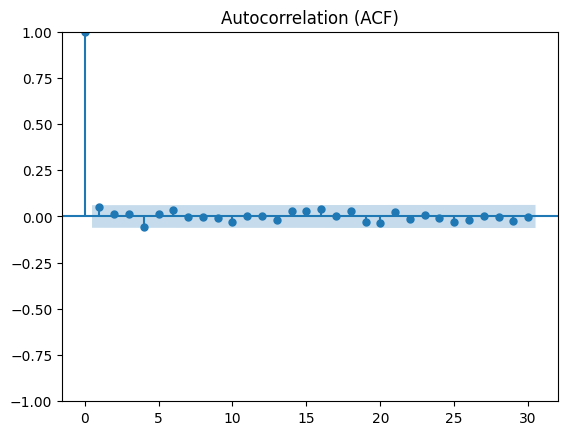

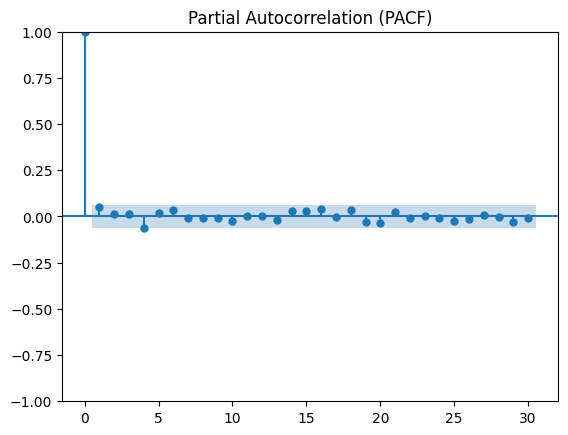

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# First-order differencing to remove trend
df_diff = df['Close'].diff().dropna()

# Plot ACF and PACF
plot_acf(df_diff, lags=30)
plt.title("Autocorrelation (ACF)")
plt.show()

plot_pacf(df_diff, lags=30)
plt.title("Partial Autocorrelation (PACF)")
plt.show()


Step 5: Fit ARIMA Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Check stationarity
result = adfuller(df['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")  # < 0.05 = stationary


ADF Statistic: -1.9983673844152345
p-value: 0.2872894027100424


In [ ]:
df_diff = df['Close'].diff().dropna()


In [ ]:
result_diff = adfuller(df_diff)
print(f"ADF Statistic (Differenced): {result_diff[0]}")
print(f"p-value (Differenced): {result_diff[1]}")


ADF Statistic (Differenced): -30.43885486851143
p-value (Differenced): 0.0


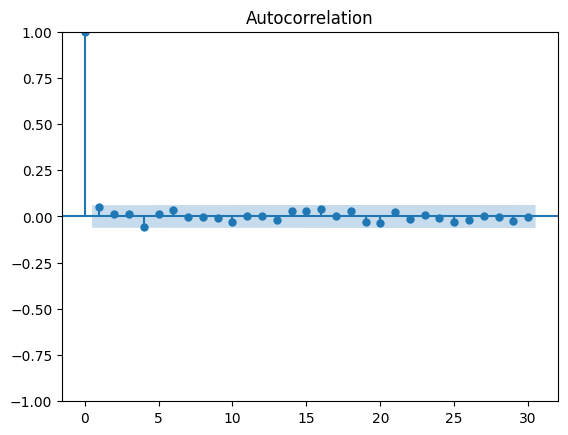

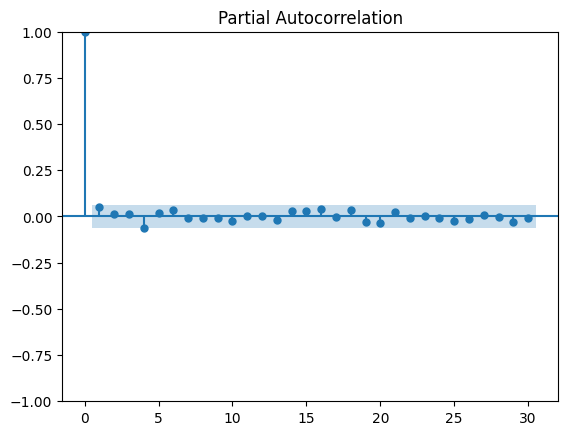

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(df_diff, lags=30)
plot_pacf(df_diff, lags=30)
plt.show()


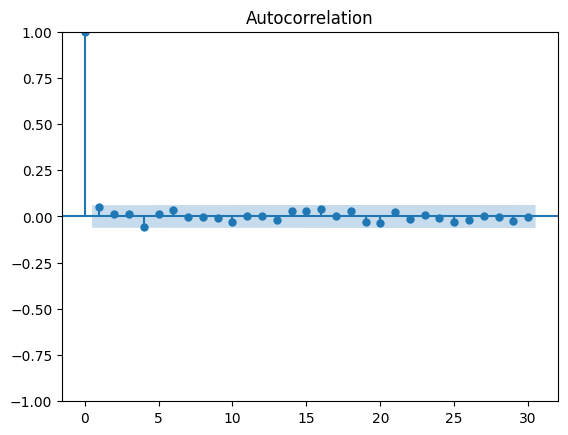

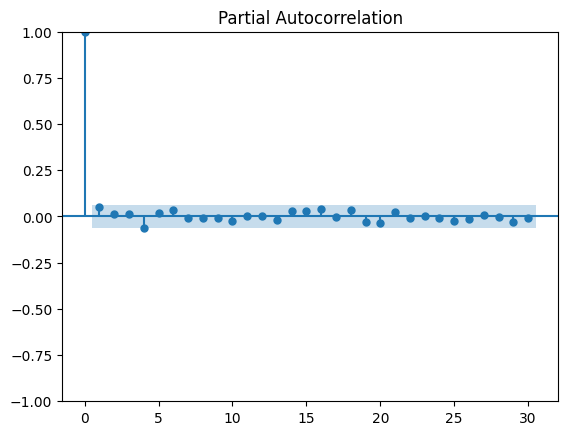

In [ ]:
plot_acf(df_diff, lags=30)
plot_pacf(df_diff, lags=30)
plt.show()


ADF Statistic: -1.9249037713404862
p-value: 0.3204377942835229
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1512
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6775.986
Date:                Tue, 24 Jun 2025   AIC                          13557.971
Time:                        01:40:39   BIC                          13573.933
Sample:                    11-27-2007   HQIC                         13563.915
                         - 01-16-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5041      0.238      2.119      0.034       0.038       0.970
ma.L1         -0.4369      0.245     -1.783      0.075      -0.917  

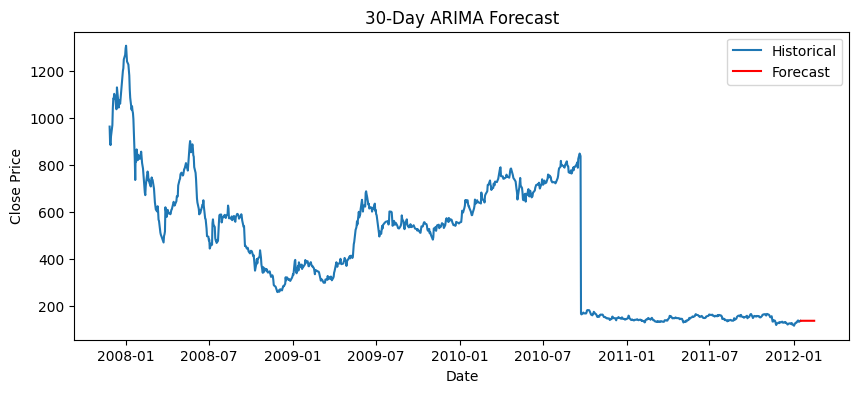

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your data
df = pd.read_csv('stock market.csv')

# Filter and preprocess
df = df[df['Symbol'] == 'MUNDRAPORT']
df = df[['Date', 'Close']].sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D')  # Set frequency to daily

# Fill missing values if any (to prevent model failure)
df['Close'] = df['Close'].interpolate()

# Check stationarity
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Fit ARIMA model
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Summary
print(model_fit.summary())

# Forecast 30 days
forecast = model_fit.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Historical')
plt.plot(pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30),
         forecast, label='Forecast', color='red')
plt.title('30-Day ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


✅ Step-by-Step SARIMA Setup
Step 1: Set your index to Date (with frequency)

In [ ]:
print(df.index)


DatetimeIndex(['2007-11-27', '2007-11-28', '2007-11-29', '2007-11-30',
               '2007-12-03', '2007-12-04', '2007-12-05', '2007-12-06',
               '2007-12-07', '2007-12-10',
               ...
               '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-16'],
              dtype='datetime64[ns]', name='Date', length=1023, freq=None)


In [ ]:
df.index = pd.DatetimeIndex(df.index)
df.index = df.index.to_period('D')


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['Close'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7))  # Weekly seasonality

model_fit = model.fit()
print(model_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 1023
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -4829.264
Date:                           Wed, 18 Jun 2025   AIC                           9668.528
Time:                                   10:33:48   BIC                           9693.141
Sample:                               11-27-2007   HQIC                          9677.876
                                    - 01-16-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2671      0.603      0.443      0.658      -0.914       1.448
ma.L1         -0.2149      0.607     -0.354

Forecast future values

<Axes: title={'center': '30-Day Forecast'}>

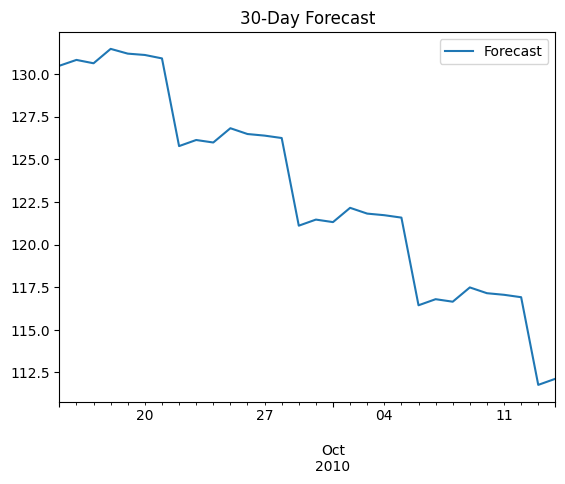

In [ ]:
forecast = model_fit.get_forecast(steps=30)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = forecast.predicted_mean

forecast_df[['Forecast']].plot(title="30-Day Forecast")


**Prophet Forecast (using Prophet to predict future)**

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

df.head()

,Close
Date,
2007-11-27,962.90
2007-11-28,893.90
2007-11-29,884.20
2007-11-30,921.55
2007-12-03,969.30


In [ ]:
# reset index of Date
df_prophet=df.reset_index()[['Date','Close']]


In [ ]:
# Rename the columns in prophet model format
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df_prophet['ds'] = df_prophet['ds'].dt.to_timestamp()

In [ ]:
df_prophet.head()
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1023 non-null   datetime64[ns]
 1   y       1023 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.1 KB


In [ ]:
# fit the prophet model
model_prophet=Prophet()
model_prophet.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjz6yxmwx/dl9wospz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjz6yxmwx/rt7tfkd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30525', 'data', 'file=/tmp/tmpjz6yxmwx/dl9wospz.json', 'init=/tmp/tmpjz6yxmwx/rt7tfkd9.json', 'output', 'file=/tmp/tmpjz6yxmwx/prophet_modeljbsbp4hb/prophet_model-20250618103410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:34:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:34:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model_prophet.make_future_dataframe(periods=365)
forecast_prophet = model_prophet.predict(future)

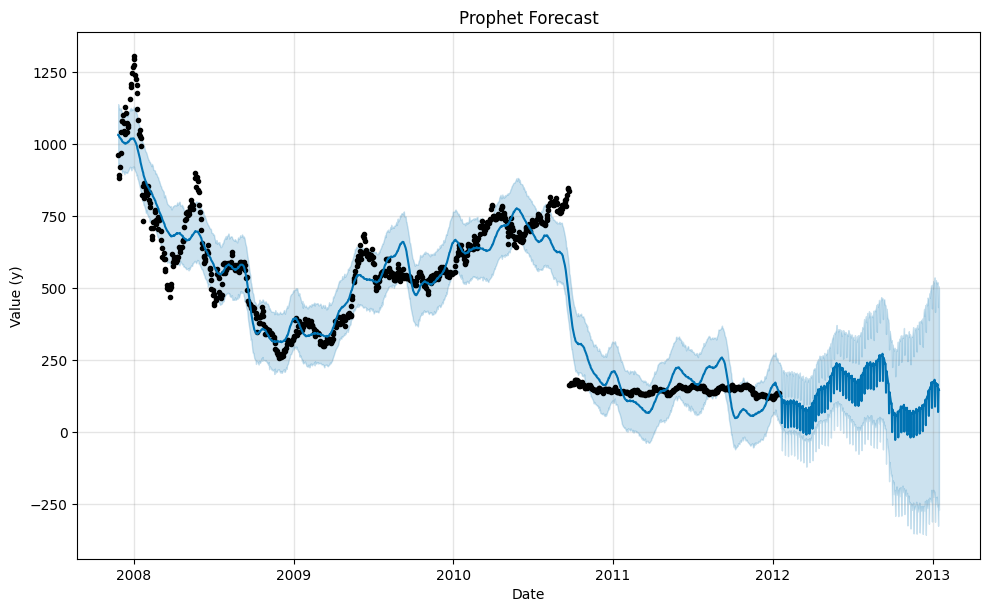

In [ ]:
# Plot the prophet forecast
fig1 = model_prophet.plot(forecast_prophet)
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Value (y)")
plt.show()

**LSTM Forecast**

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# use "Close" column only
c_df=df[['Close']].values

In [ ]:
c_df

array([[962.9 ],
       [893.9 ],
       [884.2 ],
       ...,
       [132.65],
       [131.55],
       [135.5 ]])

In [ ]:
# normalize the data
scaler=MinMaxScaler()
data_scaler=scaler.fit_transform(c_df)

In [ ]:
# create sequences for training
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaler)

In [ ]:
# split into train and test
split = int(0.8 * len(X))
X_train, X_test,y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
# build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))



In [ ]:
# compile and train the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.0541 - val_loss: 0.0055
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0044 - val_loss: 7.6922e-05
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0045 - val_loss: 2.6682e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0058 - val_loss: 1.4027e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0037 - val_loss: 6.7608e-05
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0039 - val_loss: 6.0698e-05
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0034 - val_loss: 3.3028e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0043 - val_loss: 1.7066e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0042 - val_loss: 1.8195e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0034 - val_loss: 7.5551e-05
Epoch 12/20
25/25 ━━━━━━━━

In [ ]:
# make the predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


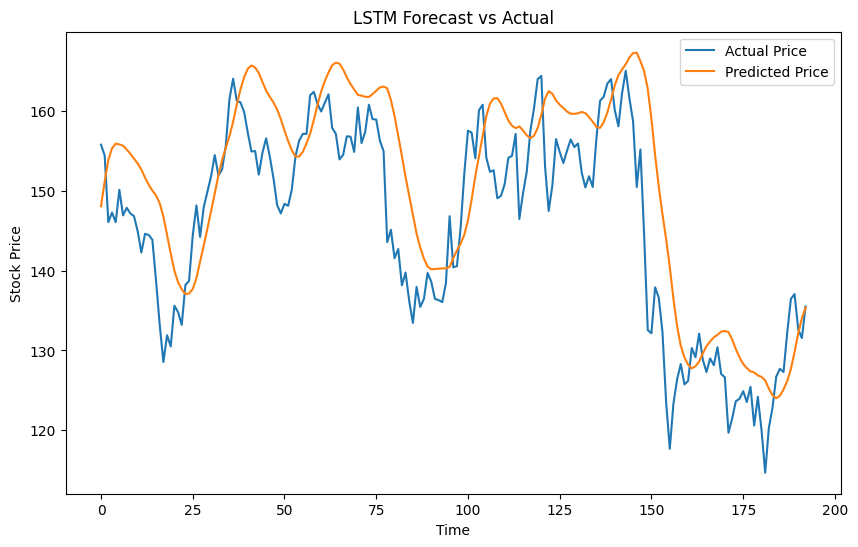

In [ ]:
# plot LSTM forecast
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()